In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score, precision_score, recall_score, f1_score,accuracy_score, confusion_matrix


### Sistema de agrupación de casas

Queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

En este caso solo nos interesan las columnas Latitude, Longitude y MedInc

In [3]:
df =  pd.read_csv('/workspaces/Antonio27M-machine-learning/data/raw/internal-link-nosupervisado.csv')

## EDA

In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.drop(columns=['HouseAge','AveRooms',	'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'])

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


Elimino las columnas que el enunciado me indica que no debo utilizar. 

### Escalado.

In [8]:
min_max_scaler = MinMaxScaler() 

num_variables = ['MedInc', 'Latitude', 'Longitude']
min_max_features = min_max_scaler.fit_transform(df[num_variables])

df_min_max = pd.DataFrame(min_max_features, index=df.index, columns=num_variables)

In [9]:
df_min_max

,MedInc,Latitude,Longitude
0,0.539668,0.567481,0.211155
1,0.538027,0.565356,0.212151
2,0.466028,0.564293,0.210159
3,0.354699,0.564293,0.209163
4,0.230776,0.564293,0.209163
...,...,...,...
20635,0.073130,0.737513,0.324701
20636,0.141853,0.738576,0.312749
20637,0.082764,0.732200,0.311753
20638,0.094295,0.732200,0.301793


### Modelado. 

In [10]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(df_min_max)

In [11]:
kmeans

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [12]:
kmeans.labels_

array([1, 1, 1, ..., 4, 4, 4], shape=(20640,), dtype=int32)

In [13]:
df_min_max['clusters'] = kmeans.labels_

In [14]:
df_min_max.head()

,MedInc,Latitude,Longitude,clusters
0,0.539668,0.567481,0.211155,1
1,0.538027,0.565356,0.212151,1
2,0.466028,0.564293,0.210159,1
3,0.354699,0.564293,0.209163,1
4,0.230776,0.564293,0.209163,4


In [15]:
df_min_max['clusters'].value_counts()

clusters
3    6182
4    5201
0    4270
1    2551
2    1730
5     706
Name: count, dtype: int64

### Slipt

In [16]:
X = df_min_max.drop('clusters', axis=1)
y = df_min_max['clusters']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=18)

In [17]:
y_train

8531     0
14417    3
11105    0
1971     4
4594     3
        ..
7136     3
18802    4
3675     3
19703    4
2697     3
Name: clusters, Length: 16512, dtype: int32

In [18]:
X_train.head()

,MedInc,Latitude,Longitude
8531,0.301727,0.144527,0.597610
14417,0.151053,0.026567,0.708167
11105,0.322637,0.138151,0.644422
1971,0.177860,0.652497,0.370518
4594,0.066316,0.160468,0.604582


### Modelado. 

In [19]:
model = DecisionTreeClassifier(random_state=18)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,18
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
model.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=18)>

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 4, 0, ..., 3, 3, 1], shape=(4128,), dtype=int32)

In [22]:
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'),  

(0.9941860465116279,
 0.9941860465116279,
 0.9941864351641087,
 0.9941874131425429)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

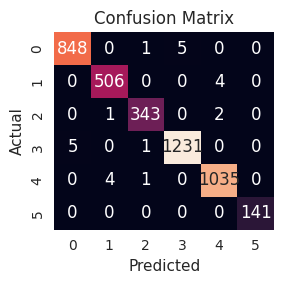

In [23]:
df_confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(df_confusion)
plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

In [24]:
with open('/workspaces/Antonio27M-machine-learning/models/modelado-kmeans.pkl', 'wb') as file:
    pickle.dump(model, file)

### Conclusiones: 

Revisando las metricas de mi modelado final, obtuvimos un 99% con unos pequeñas diferencias, expresando un pequeño margen de error. 